In [79]:
import torch
import numpy as np

from matplotlib import pyplot as plt
from functools import partial

In [78]:
ks = [1,2,3,5,10,20,30,50,100]

cifar10_performance = [74.37, 74.84, 74.75, 75.08, 75.05, 75.12, 75.08, 75.5, 75.65]
cifar10_std = [0.56, 0.41, .33, .27, .32, .31, .48, .43, .44]
cifar10_time = [135.3418787, 146.6369742, 146.50078180000003, 147.94249989999997,146.59979680000004, 142.28525770000002, 149.7010887, 166.9687559, 241.7953729]
cifar10_time_variance = [76.08870923847032, 132.41944224277935, 408.0890249910327, 202.59266920769704, 398.7892394981978, 404.37861485885975, 390.6342275695404, 185.51234494928616, 386.87172998614454]
cifar10_time_std = np.sqrt(cifar10_time_variance)
assert len(cifar10_performance) == len(cifar10_std) == len(cifar10_time) == len(cifar10_time_std) == 9

pascal_performance = [35.57, 37.65, 37.47, 37.30, 36.58, 35.80, 37.15, 36.82, 36.90]
pascal_std = [1.06, .7, .48, .99, 1.5, 1.6, .73, .43, .33]
pascal_time = [16.135655200000002, 15.60786333333333, 16.808163266666668, 17.124181666666665, 17.70223993333333, 22.577918000000004, 26.916184766666667, 73.4222094, 318.91341069931065]
pascal_time_variance = [.8962819243316267, 1.002017403236889, 1.2383523783356622, 0.7323055112202222, 0.793649643103329, 0.3809211936103334, 1.8113454237608315, 4.212744838344065, 26.062560790612565]
pascal_time_std = np.sqrt(pascal_time_variance)
assert len(pascal_performance) == len(pascal_std) == len(pascal_time) == len(pascal_time_std) == 9

peptides_performance = [60.64, 62.97, 63.13, 64.65, 65.10, 65.31, 65.14, 64.90, 65.29]
peptides_std = [1.13, .27, .65, .37, .42, .52, .76, .84, .34]
peptides_time = [9.2931019, 9.701920049999998, 10.054136600000001, 10.549371350000001, 12.7925014, 16.59700635, 21.399946499999995, 38.8262337, 150.91274378647185]
peptides_time_std = [.28881344113789004, .17551002465749743, .19499785249393997, .25156922169267754, .26386876208404003, .3813230618676775, .45326441301825, .8352748790498099, 3.579739058452471]
assert len(peptides_performance) == len(peptides_std) == len(peptides_time) == len(peptides_time_std) == 9

malnet_performance = [93, 92.92, 92.88, 93.54, 93.52, 93.26, 92.62, 92.78, 93.4]
malnet_performance_std = [.583, .691, .412, .52, .487, .45, .697, .755,.572]
malnet_time = [22.093814999999996, 23.9556306, 24.246063733333333, 26.438772199999995, 30.143462333333332, 40.9278302, 51.385138733333335, 128.1946842, 666.3551520017852]
malnet_time_std = [1.1920684193284936, 0.8921373603627265, 0.9097280237177459, 0.9018139945512563, 0.9355509707987886, 1.1518491781490434, 1.3702285149785767, 2.266193816944399, 9.45928084811682]
assert len(malnet_performance) == len(malnet_performance_std) == len(malnet_time) == len(malnet_time_std) == 9

In [84]:
print("cifar_10_time = ", list(map(partial(round, ndigits=2), cifar10_time)), sep="")
print("cifar_10_time_std = ", list(map(partial(round, ndigits=2), cifar10_time_std)), sep="")
print("pascal_time = ", list(map(partial(round, ndigits=2), pascal_time)), sep="")
print("pascal_time_std = ", list(map(partial(round, ndigits=2), pascal_time_std)), sep="")
print("peptides_time = ", list(map(partial(round, ndigits=2), peptides_time)), sep="")
print("peptides_time_std = ", list(map(partial(round, ndigits=2), peptides_time_std)), sep="")
print("malnet_time = ", list(map(partial(round, ndigits=2), malnet_time)), sep="")
print("malnet_time_std = ", list(map(partial(round, ndigits=2), malnet_time_std)), sep="")

cifar_10_time = [135.34, 146.64, 146.5, 147.94, 146.6, 142.29, 149.7, 166.97, 241.8]
cifar_10_time_std = [8.72, 11.51, 20.2, 14.23, 19.97, 20.11, 19.76, 13.62, 19.67]
pascal_time = [16.14, 15.61, 16.81, 17.12, 17.7, 22.58, 26.92, 73.42, 318.91]
pascal_time_std = [0.95, 1.0, 1.11, 0.86, 0.89, 0.62, 1.35, 2.05, 5.11]
peptides_time = [9.29, 9.7, 10.05, 10.55, 12.79, 16.6, 21.4, 38.83, 150.91]
peptides_time_std = [0.29, 0.18, 0.19, 0.25, 0.26, 0.38, 0.45, 0.84, 3.58]
malnet_time = [22.09, 23.96, 24.25, 26.44, 30.14, 40.93, 51.39, 128.19, 666.36]
malnet_time_std = [1.19, 0.89, 0.91, 0.9, 0.94, 1.15, 1.37, 2.27, 9.46]


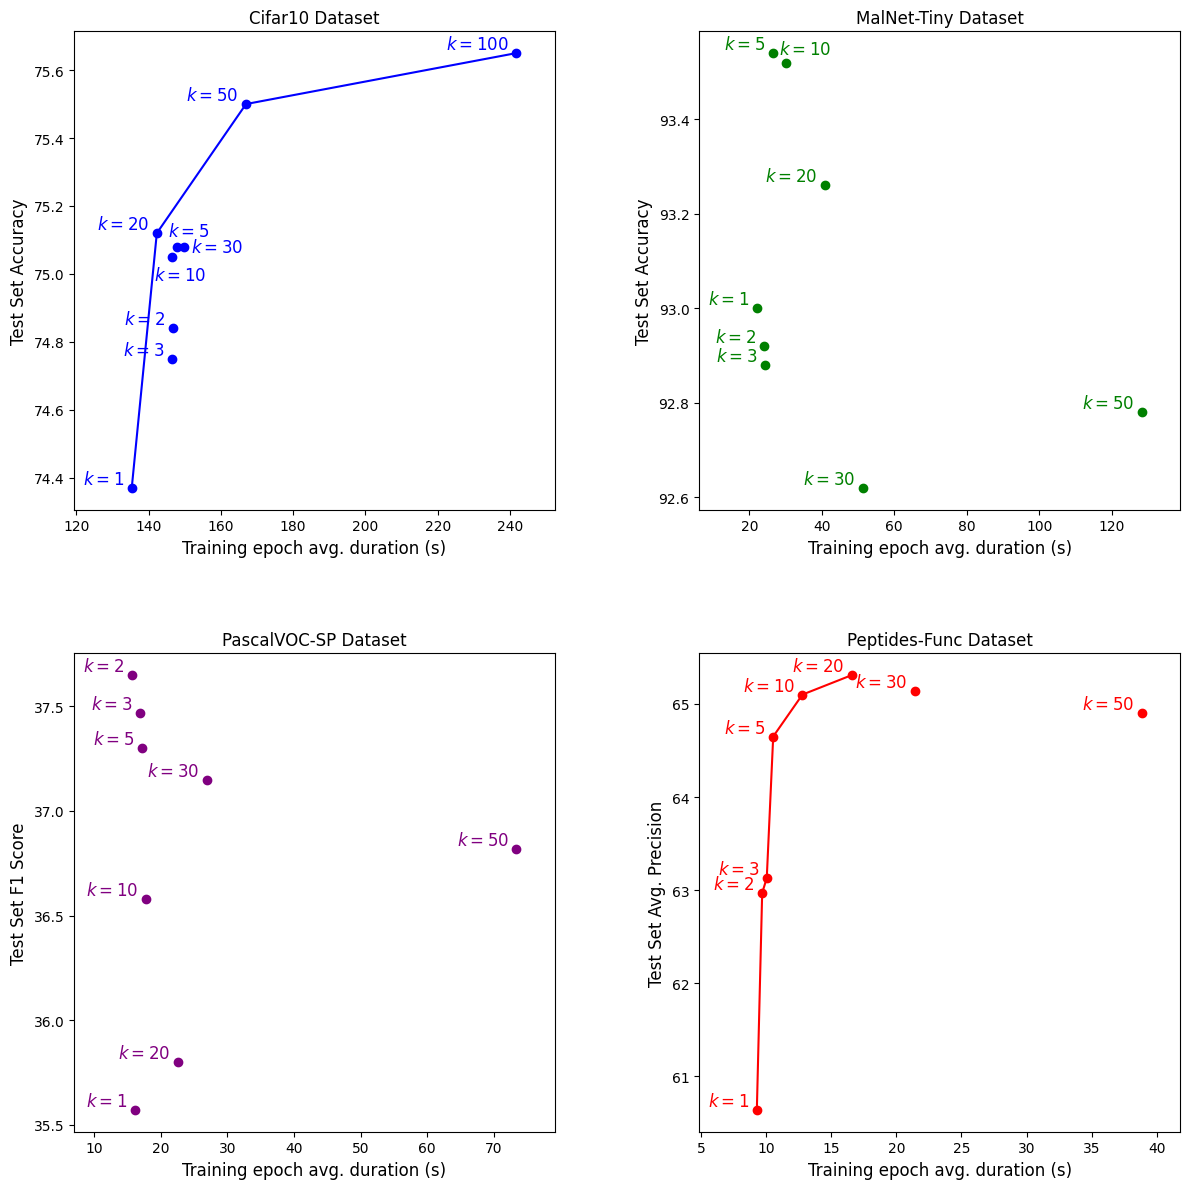

In [70]:
def find_pareto_optimal_idxs(time, performance):
    pareto_optimal_idxs = []
    assert len(time) == len(performance)
    for i in range(len(time)):
        is_pareto_optimal = True
        for j in range(len(time)):
            if time[j] < time[i] and performance[j] > performance[i]:
                is_pareto_optimal = False
                break
        if is_pareto_optimal:
            pareto_optimal_idxs.append(i)

    # sort by increasing time
    pareto_optimal_idxs = sorted(pareto_optimal_idxs, key=lambda idx: time[idx])
    
    return pareto_optimal_idxs

def plot_performance_time(ax, time, performance, ks, dataset_name, color, ylabel='Performance', draw_pareto_frontier=True):
    min_length = min(len(time), len(performance), len(ks))
    time = time[:min_length]
    performance = performance[:min_length]

    # draw points
    ax.scatter(time, performance, color=color)

    # draw pareto frontier
    if draw_pareto_frontier:
        pareto_optimal_idxs = find_pareto_optimal_idxs(time, performance)
        for i in range(1, len(pareto_optimal_idxs)):
            idx1 = pareto_optimal_idxs[i-1]
            idx2 = pareto_optimal_idxs[i]
            ax.plot([time[idx1], time[idx2]], [performance[idx1], performance[idx2]], color=color)

    # used for drawing labels in the right place
    min_time = min(time); max_time = max(time)
    time_delta = max_time - min_time
    min_performance = min(performance); max_performance = max(performance)
    performance_delta = max_performance - min_performance
    ax.set_xlim(min_time - 0.15*time_delta, max_time + 0.1*time_delta)

    # put point labels
    for i in range(min_length):
        k = ks[i]
        dx = -0.02
        dy = 0
        ha = 'right'
        va = 'bottom'

        if dataset_name == 'Cifar10':
            if k == 5:
                dx, dy = 0.03, 0.015
                ha, va = 'center', 'bottom'
            if k == 10:
                dx, dy = 0.02, -0.02
                ha, va = 'center', 'top'
            if k == 30:
                dx, dy = 0.02,0
                ha, va = 'left', 'center'
        elif dataset_name == 'MalNet-Tiny':
            if k == 10:
                dx, dy = 0.05,0.01
                ha, va = 'center', 'bottom'
        ax.text(time[i]+dx*time_delta, performance[i]+dy*performance_delta, f'$k={k}$', fontsize=12, color=color, ha=ha, va=va)

    ax.set_xlabel('Training epoch avg. duration (s)', fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.set_title(f'{dataset_name} Dataset')

# Create a figure and 4 subplots (2 row, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Plot for CIFAR10 in the first subplot
plot_performance_time(axes[0][0], cifar10_time, cifar10_performance, ks, 'Cifar10', 'blue', ylabel='Test Set Accuracy')

# Plot for MalNet in the second subplot
plot_performance_time(axes[0][1], malnet_time, malnet_performance, ks[:-1], 'MalNet-Tiny', 'green', ylabel='Test Set Accuracy', draw_pareto_frontier=False)

# Plot for Pascal in the third subplot
plot_performance_time(axes[1][0], pascal_time, pascal_performance, ks[:-1], 'PascalVOC-SP', 'purple', ylabel='Test Set F1 Score', draw_pareto_frontier=False)

# Plot for Peptides in the fourth subplot
plot_performance_time(axes[1][1], peptides_time, peptides_performance, ks[:-1], 'Peptides-Func', 'red', ylabel='Test Set Avg. Precision')

# Adjust the layout to prevent overlap
plt.tight_layout()

# Put a little space between the plots
plt.subplots_adjust(hspace=0.3, wspace=0.3)

# Display the plot
plt.show()